Importing the Libraries Used in the ARIMA Model

In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Rathore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Reading Sorted CSV(Client wise sorted and date format is not according to ARIMA requirements)

In [284]:
new = pd.read_csv('C:/Users/Rathore/Downloads/hotify/data/sorted_data.csv')

Changing date formate from (mm/dd/yy) to (yy-mm-dd)

In [285]:
formatted_date = list()
for date in new.date_of_day:
    #d= date.replace("/","-")
    a = date.split("/")[2]+"-"+date.split("/")[0]+"-"+date.split("/")[1]
    formatted_date.append(a)


In [286]:
new


,cust_name,date_of_day,sales
0,Client 2035,7/1/2015,112.11
1,Client 2035,7/2/2015,108.66
2,Client 2035,7/5/2015,60.72
3,Client 2035,7/6/2015,99.18
4,Client 2035,7/8/2015,66.96
5,Client 2035,7/9/2015,24.35
6,Client 2035,7/10/2015,34.70
7,Client 2035,7/11/2015,14.91
8,Client 2035,7/13/2015,59.36
9,Client 2035,7/15/2015,72.54


Replacing date column with formatted date to respective clients

In [287]:
new["date_of_day"] = formatted_date 
new

,cust_name,date_of_day,sales
0,Client 2035,2015-7-1,112.11
1,Client 2035,2015-7-2,108.66
2,Client 2035,2015-7-5,60.72
3,Client 2035,2015-7-6,99.18
4,Client 2035,2015-7-8,66.96
5,Client 2035,2015-7-9,24.35
6,Client 2035,2015-7-10,34.70
7,Client 2035,2015-7-11,14.91
8,Client 2035,2015-7-13,59.36
9,Client 2035,2015-7-15,72.54


In [288]:
new.to_csv("C:/Users/Rathore/Downloads/hotify/data/sorted_date_wise.csv",index =False)

Date wise sorted dataframe saved to csv

Read csv and Parsed date(Time wise sorted for each client). Then set index to client with thier dates.

In [6]:
data = pd.read_csv("C:/Users/Rathore/Downloads/hotify/data/sorted_date_wise.csv",parse_dates=['date_of_day'])
data = data.set_index(['cust_name',"date_of_day"])
test = data.loc["Client 240"]




For testing a single client concidered "client 240"

Ploting Client purchase behaviour date-wise

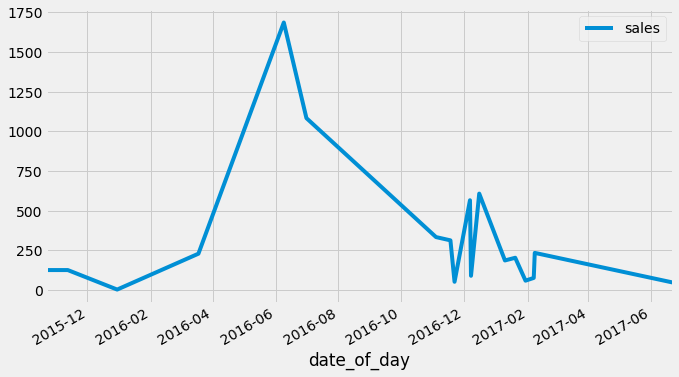

In [7]:
test.plot(figsize=(10, 6))
plt.show()


Generating random sets of Parameter to feed in model

In [50]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Grid Search each parameter and calculated AIC value.The Parameter having least AIC is fit for that client.

In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
min_val = 30000
params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if min_val > results.aic:
                min_val = results.aic
                params.append([param, param_seasonal])
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:77.88933250520353
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:247.4598713081426
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:67.57422092041384
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:75.73376481863167
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:61.54410737443293
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:231.91500108747792
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:52.53097820736417
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:63.527136217322635
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:259.4291083873192
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:82.22284391570511
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:61.803819102442205
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:247.33864059535395
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:69.48900856933773
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:61.34199366437949
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:248.13288334256367
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:67.55902057937641
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:52.526282163199475
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:232.55692482733218
ARI

In [52]:
print(min_val)

50.291932437


In [57]:
print(params[-1])

[(1, 1, 1), (1, 0, 0, 12)]


In [266]:
mod = sm.tsa.statespace.SARIMAX(test,
                                order=params[-1][0],
                                seasonal_order=params[-1][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp= -1)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9276      0.347      2.672      0.008       0.247       1.608
ma.L1         -1.0001      1.111     -0.900      0.368      -3.178       1.178
ar.S.L12       0.1615      0.061      2.653      0.008       0.042       0.281
sigma2      2169.3344      0.001   4.24e+06      0.000    2169.333    2169.335


Plotig Results

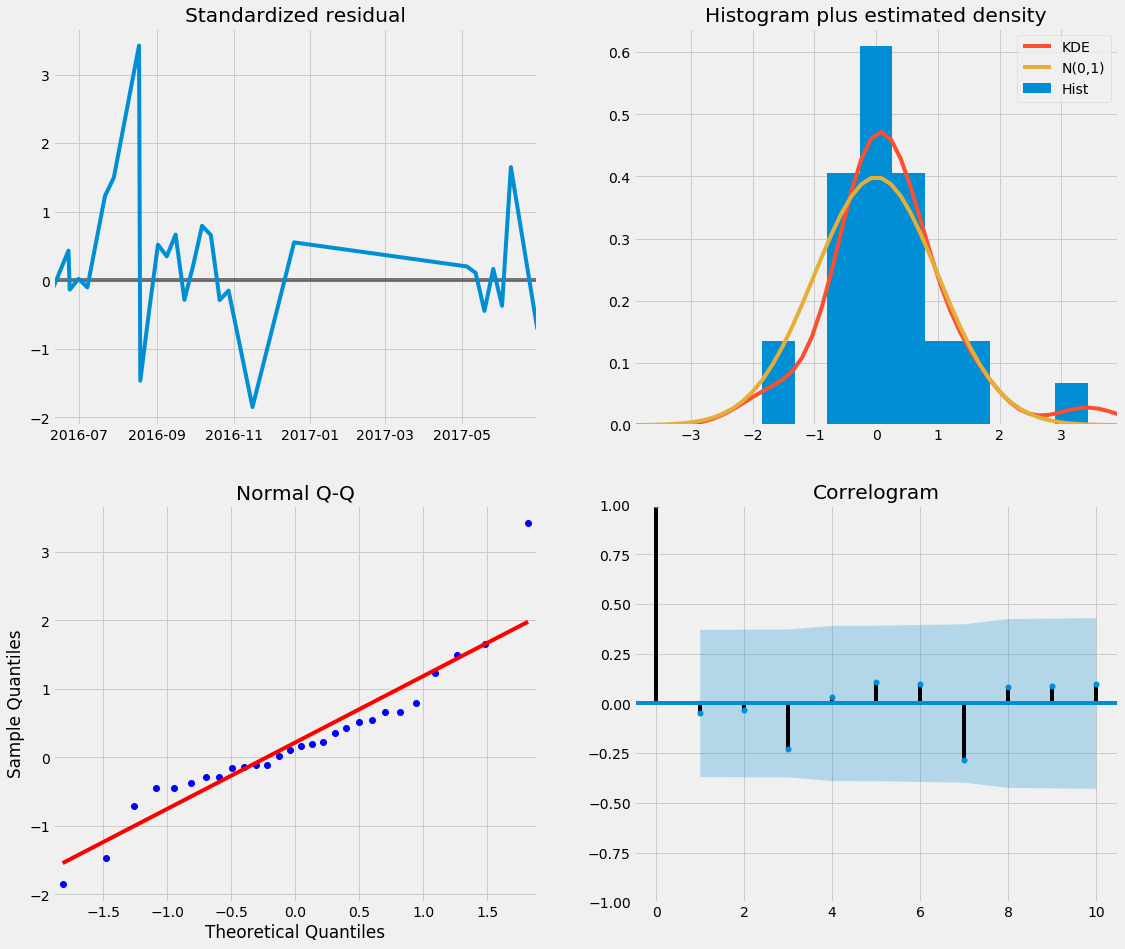

In [234]:
results.plot_diagnostics(figsize=(17, 15))
plt.show()

In [378]:
# pred_original = results.predict(start = 1, end = (len(test)-1),dynamic = False)
# found = (pred_original.values)
# given= (test.values)

# mse = ((found-(given) ) ** 2).mean()
# mse

Forcasting the client for no of sales equal to given no of sales

In [347]:
#print(results.forecast(100))
pred = results.predict(start = len(test)-1, end = (2*len(test)-2),dynamic = False)  
predict_list = list(pred)
predict_list


[79.306861296323746,
 -130.42170123590358,
 -186.72109371861293,
 -278.00767640257459,
 -240.64373753288638,
 -359.78036090562097,
 -315.37211767141787,
 -419.77936993363471,
 -450.81027692504153,
 -505.40701647623825,
 -531.66529292215262,
 -533.14823410666963,
 -588.23764926137483,
 -640.18978661514757,
 -670.78894761778838,
 -705.4815977134914,
 -717.95588048354887,
 -754.36289527049553]

Condition for churning client:-
1. If client sales is decreasing in forecast sale then he is going to churn in future.
2. If net forecast is negative he is sure going to churn.(or conditin of 1st if)
3. If mean of forecast sale is less than 90% of the given mean sale , he is prone to churn.

In [380]:
mean_sales = sum(test.values)/len(test)
mean_forecast = sum(predict_list)/len(predict_list)
if predict_list == sorted(predict_list, reverse=True) or sum(predict_list) < 0 :
   print('client is goint to quit!')
elif mean_forecast < (mean_sales * .90):
   print("client is going to churn!")
else :
    print("client is doing fine")

client is goint to quit!


Forecast Plot

In [64]:
data = pd.read_csv("C:/Users/Rathore/Downloads/hotify/data/sorted_date_wise.csv",parse_dates=['date_of_day'])
client_list = data['cust_name'].unique()
len(client_list)

1739

Again testing on 1st 100 clients from total of 1739

In [60]:
churning_client = list()
data = pd.read_csv("C:/Users/Rathore/Downloads/hotify/data/sorted_date_wise.csv",parse_dates=['date_of_day'])
client_list = data['cust_name'].unique()[0:100]
data = data.set_index(['cust_name',"date_of_day"])
# i = 0
for i in client_list:
    test = data.loc[i]
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    warnings.filterwarnings("ignore") # specify to ignore warning messages
    min_val = 30000
    params = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(test,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                if min_val > results.aic:
                    min_val = results.aic
                    params.append([param, param_seasonal])
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

    mod = sm.tsa.statespace.SARIMAX(test,
                                    order=params[-1][0],
                                    seasonal_order=params[-1][1],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()


    pred = results.predict(start = len(test)-1, end = (2*len(test)-2),dynamic = False)  
    predict_list = list(pred)


    mean_sales = sum(test.values)/len(test)
    mean_forecast = sum(predict_list)/len(predict_list)
    if sum(predict_list) < 0 or mean_forecast < (mean_sales * .80  ):
       print('{} is goint to churn!'.format(i))
       churning_client.append(i)


Client 1498 is goint to churn!
Client 1529 is goint to churn!
Client 2025 is goint to churn!
Client 1351 is goint to churn!
Client 391 is goint to churn!
Client 1394 is goint to churn!
Client 710 is goint to churn!
Client 2017 is goint to churn!
Client 1758 is goint to churn!
Client 1951 is goint to churn!
Client 1968 is goint to churn!
Client 184 is goint to churn!
Client 1123 is goint to churn!
Client 340 is goint to churn!
Client 2260 is goint to churn!
Client 1032 is goint to churn!
Client 1153 is goint to churn!
Client 781 is goint to churn!
Client 764 is goint to churn!
Client 1403 is goint to churn!


In [ ]:
df = pd.DataFrame(churning_client)
df.to_csv('C:/Users/Rathore/Downloads/hotify/data/churning100', index=False)

churning clients from first 100 client saving to csv

Applying to the remaining clients:-

In [4]:
churning_client_remaining = list()
data = pd.read_csv("C:/Users/Rathore/Downloads/hotify/data/sorted_date_wise.csv",parse_dates=['date_of_day'])
client_list = data['cust_name'].unique()[100:1739]
data = data.set_index(['cust_name',"date_of_day"])
# i = 0
for i in client_list:
    test = data.loc[i]
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    warnings.filterwarnings("ignore") # specify to ignore warning messages
    min_val = 1000000
    params = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(test,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                if min_val > results.aic:
                    min_val = results.aic
                    params.append([param, param_seasonal])
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    try:
        mod = sm.tsa.statespace.SARIMAX(test,
                                        order=params[-1][0],
                                        seasonal_order=params[-1][1],
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()


        pred = results.predict(start = len(test)-1, end = (2*len(test)-2),dynamic = False)  
        predict_list = list(pred)


        mean_sales = sum(test.values)/len(test)
        mean_forecast = sum(predict_list)/len(predict_list)
        if sum(predict_list) < 0 or mean_forecast < (mean_sales * .80  ):
           print('{} is goint to churn!'.format(i))
           churning_client_remaining.append(i)
    except:
        continue

Client 146 is goint to churn!
Client 2031 is goint to churn!
Client 1057 is goint to churn!
Client 1135 is goint to churn!
Client 563 is goint to churn!
Client 2077 is goint to churn!
Client 1535 is goint to churn!
Client 167 is goint to churn!
Client 1980 is goint to churn!
Client 864 is goint to churn!
Client 593 is goint to churn!
Client 1020 is goint to churn!
Client 233 is goint to churn!
Client 1303 is goint to churn!
Client 2091 is goint to churn!
Client 1538 is goint to churn!
Client 118 is goint to churn!
Client 2165 is goint to churn!
Client 1370 is goint to churn!
Client 1467 is goint to churn!
Client 738 is goint to churn!
Client 2230 is goint to churn!
Client 2022 is goint to churn!
Client 1806 is goint to churn!
Client 817 is goint to churn!
Client 2220 is goint to churn!
Client 2197 is goint to churn!
Client 1283 is goint to churn!
Client 1729 is goint to churn!
Client 242 is goint to churn!
Client 505 is goint to churn!
Client 1944 is goint to churn!
Client 142 is goint

Client 1322 is goint to churn!
Client 1930 is goint to churn!
Client 209 is goint to churn!
Client 42 is goint to churn!
Client 573 is goint to churn!
Client 174 is goint to churn!
Client 2030 is goint to churn!
Client 2048 is goint to churn!
Client 1014 is goint to churn!
Client 1519 is goint to churn!
Client 1511 is goint to churn!
Client 179 is goint to churn!
Client 2267 is goint to churn!
Client 2222 is goint to churn!
Client 938 is goint to churn!
Client 2226 is goint to churn!
Client 84 is goint to churn!
Client 875 is goint to churn!
Client 2167 is goint to churn!
Client 648 is goint to churn!
Client 1746 is goint to churn!
Client 2299 is goint to churn!
Client 1180 is goint to churn!
Client 2199 is goint to churn!
Client 761 is goint to churn!
Client 1677 is goint to churn!
Client 1965 is goint to churn!
Client 2069 is goint to churn!
Client 1339 is goint to churn!
Client 1636 is goint to churn!
Client 1143 is goint to churn!
Client 674 is goint to churn!
Client 947 is goint t

In [5]:
df = pd.DataFrame(churning_client_remaining)
df.to_csv('C:/Users/Rathore/Downloads/hotify/data/churning_remaining', index=False)

csv of churning clients:-
1.churning100(0-100)
2.churning_remaining(100:1739)